Given an m x n grid. Each cell of the grid has a sign pointing to the next cell you should visit if you are currently in this cell. The sign of grid[i][j] can be:

    1 which means go to the cell to the right. (i.e go from grid[i][j] to grid[i][j + 1])
    2 which means go to the cell to the left. (i.e go from grid[i][j] to grid[i][j - 1])
    3 which means go to the lower cell. (i.e go from grid[i][j] to grid[i + 1][j])
    4 which means go to the upper cell. (i.e go from grid[i][j] to grid[i - 1][j])

Notice that there could be some signs on the cells of the grid that point outside the grid.

You will initially start at the upper left cell (0, 0). A valid path in the grid is a path that starts from the upper left cell (0, 0) and ends at the bottom-right cell (m - 1, n - 1) following the signs on the grid. The valid path does not have to be the shortest.

You can modify the sign on a cell with cost = 1. You can modify the sign on a cell one time only.

Return the minimum cost to make the grid have at least one valid path.

 

Example 1:

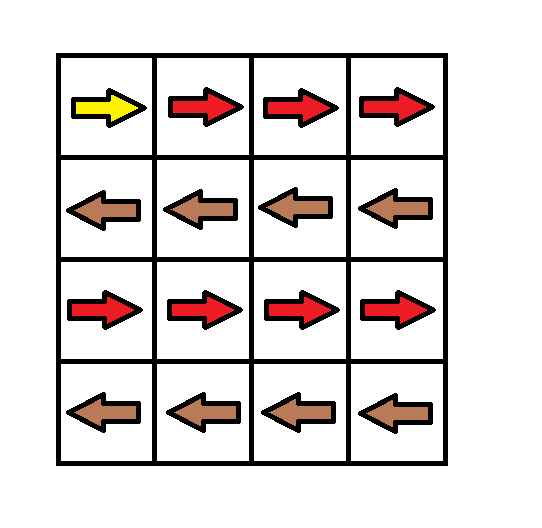

Input: grid = [[1,1,1,1],[2,2,2,2],[1,1,1,1],[2,2,2,2]]
Output: 3
Explanation: You will start at point (0, 0).
The path to (3, 3) is as follows. (0, 0) --> (0, 1) --> (0, 2) --> (0, 3) change the arrow to down with cost = 1 --> (1, 3) --> (1, 2) --> (1, 1) --> (1, 0) change the arrow to down with cost = 1 --> (2, 0) --> (2, 1) --> (2, 2) --> (2, 3) change the arrow to down with cost = 1 --> (3, 3)
The total cost = 3.

Example 2:

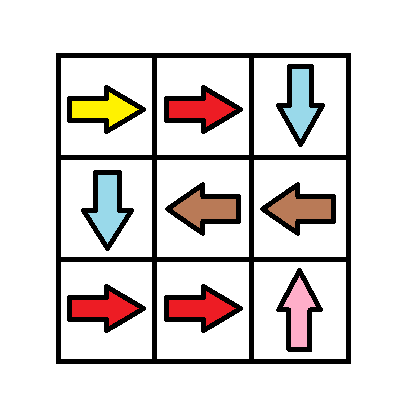

Input: grid = [[1,1,3],[3,2,2],[1,1,4]]
Output: 0
Explanation: You can follow the path from (0, 0) to (2, 2).

Example 3:

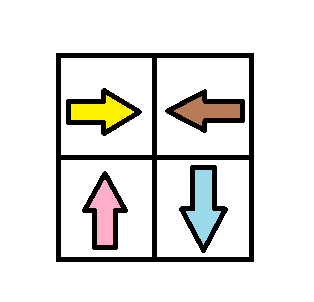

Input: grid = [[1,2],[4,3]]
Output: 1

 

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 100
    1 <= grid[i][j] <= 4



In [ ]:
class Solution:
    def minCost(self, grid: List[List[int]]) -> int:
        m = len(grid)
        n = len(grid[0])
        visited = [[float("inf") for _ in range(n)] for _ in range(m)]
        q = [(0, 0, 0)]
        heapq.heapify(q)
        while q:
            cost, i, j = heapq.heappop(q)
            if i == m - 1 and j == n - 1:
                return cost
            if visited[i][j] > cost:
                visited[i][j] = cost
                for k, (di, dj) in enumerate([(0, 1), (0, -1), (1, 0), (-1, 0)]):
                    if 0 <= i + di < m and 0 <= j + dj < n:
                        if k + 1 != grid[i][j]:
                            newcost = cost + 1
                        else:
                            newcost = cost
                        heapq.heappush(q, (newcost, i + di, j + dj))
